<a href="https://colab.research.google.com/github/timaZhuk/JavaScript-Tic-Tac-Toe-practice/blob/main/PYMLtorch2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First steps in PyTorch

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


# We load the FashionMNIST Dataset with the following parameters:
* root is the path where the train/test data is stored,

* train specifies training or test dataset,

* download=True downloads the data from the internet if it’s not available at root.

* transform and target_transform specify the feature and label transformations

In [ ]:
# Every TorchVision Dataset includes two arguments transform and target_transform
#Download training data from datasets
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

#Download test data from open dataset
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(),


)

100%|██████████| 26421880/26421880 [00:01<00:00, 15628539.73it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 263098.92it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4968742.53it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5267693.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



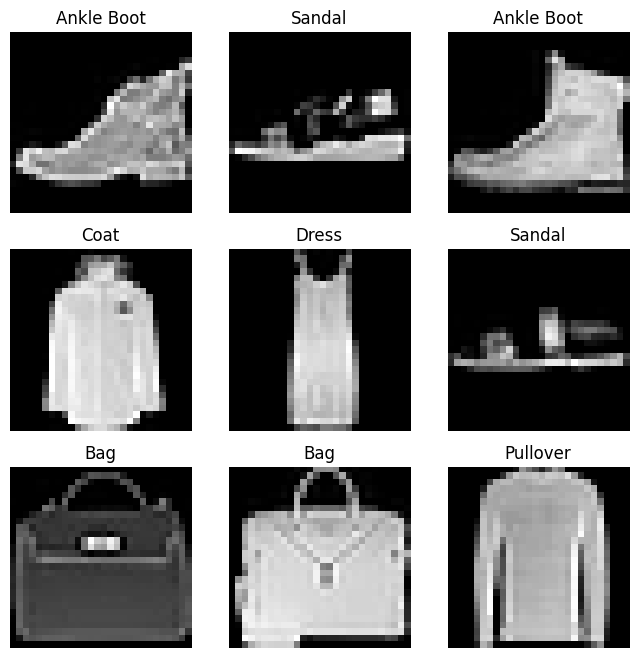

In [ ]:
labels_map = {
    0:"T-shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}
#-------------------------------------------
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for  i in range(1, cols*rows+1): # from 1 to 10
  sample_idx = torch.randint(len(training_data), size=(1,)).item() # index of sample
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label]) # add label by name of dictionary
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [ ]:
#We pass the Dataset as an argument to DataLoader.
# This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading.
#  Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.
batch_size=64
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f'Shape of X [N, C, H, W]: {X.shape}')
  print(f'shape of y: {y.shape}{y.dtype}')
  break




Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64])torch.int64


# Creating Model

In [ ]:
# Get cpu, gpu or mps device for training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"

)

print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,0)
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits


model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=0, bias=True)
  )
)


/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


# Pytorch workflow
* 1 Get Data Ready (turn into tensor)
* 2 Build or pick a pretrained model (to suit your problem). Pick a loss function and Build a training loop
* Fit (training) the model to the data make a prediction
* Evaluate the model (= inference)
* Improve through experimentation
* Save and reload your trained model
*

In [ ]:
import torch
from torch import nn # nn contains all PyTorch building blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__


'2.1.0+cu121'

# Data can be everything
* Excel spread sheets
* Imeges of any kind
* Videos
* Audio like podcast or songs
* DNA
* Text
# Machinelearning is a game of two parts
* Get data into a numerical representation
* Build a model learn patterns in the numerical representation
# Let's start with Linear Regression Formula

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3
# create numbers betwen 0...1
start = 0
end = 1
step = 0.02
# https://stackoverflow.com/questions/57237352/what-does-unsqueeze-do-in-pytorch
# unsqueeze turns an n.d. tensor into an (n+1).d. one by adding an extra dimension of depth 1.
# However, since it is ambiguous which axis the new dimension should lie across (i.e. in which direction it should be "unsqueezed"),
# this needs to be specified by the dim argument.
#e.g. unsqueeze can be applied to a 2d tensor three different ways
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
print(X[:10], y[:10])
print()
len(X), len(y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])



(50, 50)

## Splitting data into training and test sets(one of the most important concepts in ML in general)
* create a training spilt

In [ ]:
train_split = int(0.8*len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train)


(40, 40)

In [ ]:
len(X_test), len(y_test)

(10, 10)

# Plot our data

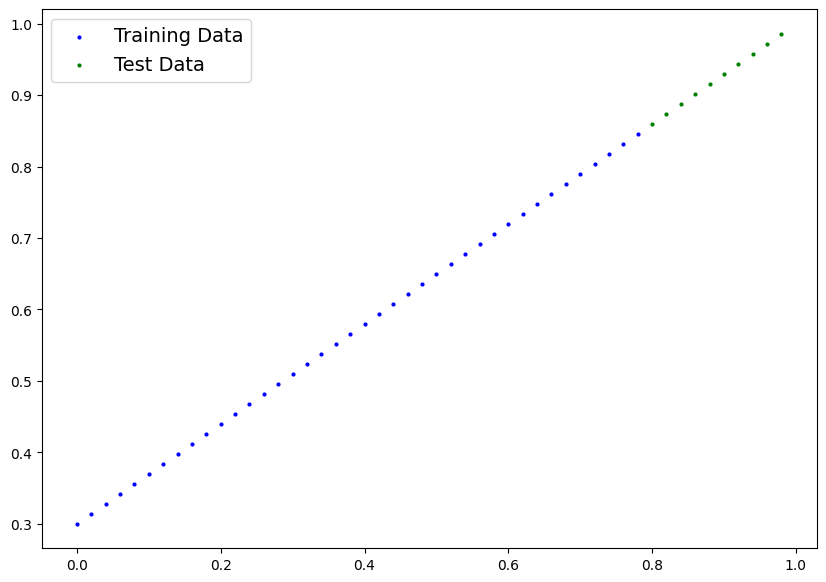

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions Data")
  plt.legend(prop={"size":14})

#plot data (invoke function)
plot_predictions()


# Create the model
* Almost everything in PyTorch inherits from nn.MOdel
* create the Linear Regression Model
# What our model does
* Start with andom values (weights and bisas)
* Look at training data and adjust the random values to better represent (or get close to ) ideal values (the bias and weight values we used to creat the data)
# How does it work?
* Gradient descent
* Back propagation


In [ ]:
# lambda function example
# def myfunc(n):
  #return lambda a : a * n
# These are function annotations covered in PEP 3107. Specifically, the -> marks the return function annotation.
# def kinetic_energy(m:'in KG', v:'in M/S')->'Joules':
#    return 1/2*m*v**2

#>>> kinetic_energy.__annotations__
#{'return': 'Joules', 'v': 'in M/S', 'm': 'in KG'}

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__() # inheriet the constructor from nn.Model
    # define the input parameters in our Model's constructor
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=float)) #
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=float))
    #Forward method to define he computation in the model
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias # this is the linear regression



In [ ]:
# Create a random seed
torch.manual_seed(42)
#Create a instance of our model
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

# Make predictions using 'torch.inference_mode()'
* to check predictive power of our model
* y_test based on X_test

In [ ]:
# make predictions with model
# this mode is disabled all functions (in our model) like gradient
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

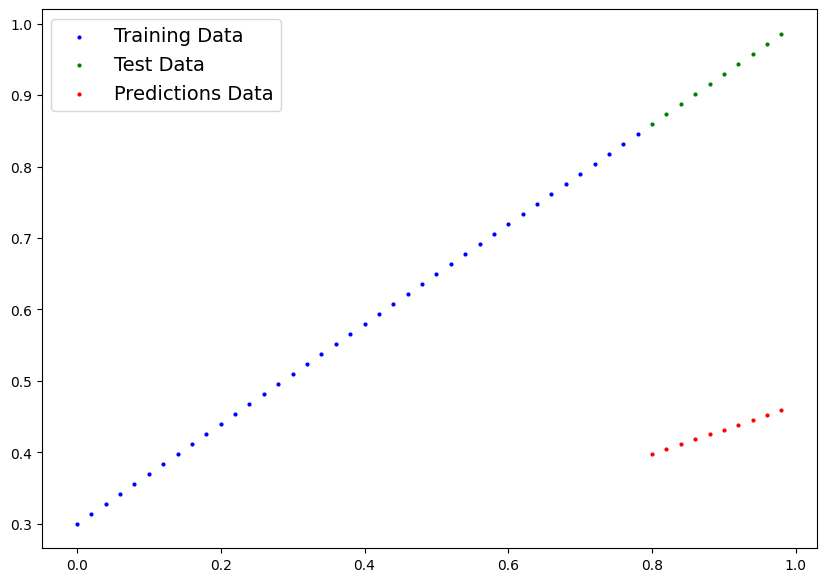

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

# Train model
* The whole idea of training is for a model to move from some *unknown* parameters (these may be random)  to some *known* parameters.
* **Loss function** A function to measure how wromg your model's predictions are to compare with ideal outputs
* **Optimizer** takes in account the loss of a model and adjust the model's parameters.
* we need the: traning loop and test loop

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr-learning rate, important hyperparameter
